In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
data = pd.read_csv(r"D:/Project-1 DSA/LiverT_dataset.csv")
data 

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3.9,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3.4,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7.2,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11.0,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2.7,1.5,1.0,Other,3,Renal Dysfunction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1938,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2.5,1.9,0.0,Other,5,Primary Graft Non-function
1939,1935,30,Male,32.8,Stroke,1,1,0,0,1,...,11.0,0.7,22590,255478,8.8,1.6,0.0,Tacrolimus,2,Infection
1940,1936,52,Female,21.0,Other,1,0,1,1,1,...,2.4,0.3,10029,349280,5.4,4.8,0.0,Tacrolimus,5,Portal Vein Thrombosis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1942 non-null   int64  
 1   D_Age                           1942 non-null   int64  
 2   D_Gender                        1942 non-null   object 
 3   D_BMI                           1942 non-null   float64
 4   D_Cause of Death                1942 non-null   object 
 5   D_Diabetes                      1942 non-null   int64  
 6   D_Hypertension                  1942 non-null   int64  
 7   D_Alcohol_Abuse                 1942 non-null   int64  
 8   D_Smoking                       1942 non-null   int64  
 9   D_Lympochyte                    1942 non-null   int64  
 10  D_HepatitisB                    1941 non-null   float64
 11  D_HepatitisC                    1942 non-null   int64  
 12  R_Etiology                      19

In [4]:
data.describe()

,Column1,D_Age,D_BMI,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,D_HepatitisB,D_HepatitisC,...,R_Alcoholic_cirrhosis,R_Primary_biliary_cirrhosis,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Rejection_Episodes
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000,...,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000
mean,967.600412,44.181771,29.077240,0.736354,0.792482,0.465499,0.233780,0.610711,0.493045,0.409887,...,48.104016,9.193512,9.912770,0.988671,14067.858908,302047.562307,6.910041,2.987127,0.492014,2.503605
std,560.580638,15.088112,6.349143,0.440723,0.405634,0.498937,0.423343,0.487715,0.500080,0.491939,...,28.426256,7.574906,9.513351,0.907809,6384.729938,86092.055847,2.838200,1.164749,0.500065,1.706652
min,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.000000,3005.000000,150189.000000,2.000000,1.000000,0.000000,0.000000
25%,482.250000,31.000000,23.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,3.000000,2.900000,0.300000,8684.250000,224463.250000,4.400000,1.900000,0.000000,1.000000
50%,967.500000,44.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,47.000000,7.150000,6.900000,0.700000,14061.000000,303644.000000,6.850000,3.000000,0.000000,3.000000
75%,1452.750000,57.000000,34.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,72.000000,13.400000,14.200000,1.400000,19688.000000,375117.000000,9.400000,4.000000,1.000000,4.000000
max,1937.000000,70.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,100.000000,25.000000,50.000000,3.500000,24983.000000,449992.000000,12.000000,5.000000,1.000000,5.000000


In [5]:
#MEAN / MEDIAN / MODE
print(data.mean())
print('\n')
print(data.median())
print('\n')
print(data.mode())

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\3313344155.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.mean())
C:\Users\91866\AppData\Local\Temp\ipykernel_8028\3313344155.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.median())


Column1                           967.600412
D_Age                              44.181771
D_BMI                              29.077240
D_Diabetes                          0.736354
D_Hypertension                      0.792482
D_Alcohol_Abuse                     0.465499
D_Smoking                           0.233780
D_Lympochyte                        0.610711
D_HepatitisB                        0.493045
D_HepatitisC                        0.409887
R_MELD_Score                       20.674047
R_Age                              44.799691
R_BMI                              24.873416
R_Diabetes                          0.681256
R_Hypertension                      0.123584
R_Alcohol_Abuse                     0.285788
R_Smoking                           0.147786
R_Lympochyte                        0.399279
R_HepatitisB                        0.195160
R_HepatitisC                        0.316169
R_Albumin_level                    40.280639
R_Alcoholic_cirrhosis              48.104016
R_Primary_

In [6]:
data.mean()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Column1                           967.600412
D_Age                              44.181771
D_BMI                              29.077240
D_Diabetes                          0.736354
D_Hypertension                      0.792482
D_Alcohol_Abuse                     0.465499
D_Smoking                           0.233780
D_Lympochyte                        0.610711
D_HepatitisB                        0.493045
D_HepatitisC                        0.409887
R_MELD_Score                       20.674047
R_Age                              44.799691
R_BMI                              24.873416
R_Diabetes                          0.681256
R_Hypertension                      0.123584
R_Alcohol_Abuse                     0.285788
R_Smoking                           0.147786
R_Lympochyte                        0.399279
R_HepatitisB                        0.195160
R_HepatitisC                        0.316169
R_Albumin_level                    40.280639
R_Alcoholic_cirrhosis              48.104016
R_Primary_

In [7]:
#VARIANCE / STANDARD DEVIATION
print(data.var())
print('\n')
print(data.std())

Column1                        3.142507e+05
D_Age                          2.276511e+02
D_BMI                          4.031162e+01
D_Diabetes                     1.942367e-01
D_Hypertension                 1.645390e-01
D_Alcohol_Abuse                2.489379e-01
D_Smoking                      1.792190e-01
D_Lympochyte                   2.378656e-01
D_HepatitisB                   2.500805e-01
D_HepatitisC                   2.420042e-01
R_MELD_Score                   2.976645e+01
R_Age                          2.259985e+02
R_BMI                          2.321357e+01
R_Diabetes                     2.172580e-01
R_Hypertension                 1.083667e-01
R_Alcohol_Abuse                2.042183e-01
R_Smoking                      1.260100e-01
R_Lympochyte                   2.399789e-01
R_HepatitisB                   1.571533e-01
R_HepatitisC                   2.163175e-01
R_Albumin_level                3.716128e+01
R_Alcoholic_cirrhosis          8.080520e+02
R_Primary_biliary_cirrhosis    5

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\2480925587.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.var())
C:\Users\91866\AppData\Local\Temp\ipykernel_8028\2480925587.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.std())


In [8]:
#SKEWNESS 
data.skew()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\2895241641.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Column1                        0.000894
D_Age                         -0.042691
D_BMI                         -0.010029
D_Diabetes                    -1.073681
D_Hypertension                -1.443584
D_Alcohol_Abuse                0.138439
D_Smoking                      1.259003
D_Lympochyte                  -0.454465
D_HepatitisB                   0.027845
D_HepatitisC                   0.366737
R_MELD_Score                   0.077396
R_Age                         -0.066084
R_BMI                         -0.003767
R_Diabetes                    -0.778544
R_Hypertension                 2.289273
R_Alcohol_Abuse                0.949018
R_Smoking                      1.986469
R_Lympochyte                   0.411635
R_HepatitisB                   1.539530
R_HepatitisC                   0.791317
R_Albumin_level               -0.031042
R_Alcoholic_cirrhosis          0.073373
R_Primary_biliary_cirrhosis    0.832740
R Na                           1.638240
R_Mg                           1.186530


In [9]:
#KURTOSIS
data.kurt()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\3829504898.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


Column1                       -1.201083
D_Age                         -1.173611
D_BMI                         -1.204316
D_Diabetes                    -0.848083
D_Hypertension                 0.084021
D_Alcohol_Abuse               -1.982878
D_Smoking                     -0.415340
D_Lympochyte                  -1.795311
D_HepatitisB                  -2.001288
D_HepatitisC                  -1.867428
R_MELD_Score                  -1.180970
R_Age                         -1.151490
R_BMI                         -0.526041
R_Diabetes                    -1.395308
R_Hypertension                 3.244112
R_Alcohol_Abuse               -1.100500
R_Smoking                      1.948064
R_Lympochyte                  -1.832446
R_HepatitisB                   0.370534
R_HepatitisC                  -1.375234
R_Albumin_level               -1.194211
R_Alcoholic_cirrhosis         -1.112879
R_Primary_biliary_cirrhosis   -0.421478
R Na                           3.128179
R_Mg                           0.677945


In [10]:
data.describe()

,Column1,D_Age,D_BMI,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,D_HepatitisB,D_HepatitisC,...,R_Alcoholic_cirrhosis,R_Primary_biliary_cirrhosis,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Rejection_Episodes
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000,...,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000
mean,967.600412,44.181771,29.077240,0.736354,0.792482,0.465499,0.233780,0.610711,0.493045,0.409887,...,48.104016,9.193512,9.912770,0.988671,14067.858908,302047.562307,6.910041,2.987127,0.492014,2.503605
std,560.580638,15.088112,6.349143,0.440723,0.405634,0.498937,0.423343,0.487715,0.500080,0.491939,...,28.426256,7.574906,9.513351,0.907809,6384.729938,86092.055847,2.838200,1.164749,0.500065,1.706652
min,0.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.100000,0.000000,3005.000000,150189.000000,2.000000,1.000000,0.000000,0.000000
25%,482.250000,31.000000,23.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,3.000000,2.900000,0.300000,8684.250000,224463.250000,4.400000,1.900000,0.000000,1.000000
50%,967.500000,44.000000,29.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,47.000000,7.150000,6.900000,0.700000,14061.000000,303644.000000,6.850000,3.000000,0.000000,3.000000
75%,1452.750000,57.000000,34.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,72.000000,13.400000,14.200000,1.400000,19688.000000,375117.000000,9.400000,4.000000,1.000000,4.000000
max,1937.000000,70.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,100.000000,25.000000,50.000000,3.500000,24983.000000,449992.000000,12.000000,5.000000,1.000000,5.000000


In [11]:
#Typecasting :
#As Python automatically interprets the data types, there may be a requirement for the data type to be converted. The process of converting one data type to another data type is called Typecasting.
#Example:
    
#1) int to float
#2) float to int

data.dtypes

Column1                             int64
D_Age                               int64
D_Gender                           object
D_BMI                             float64
D_Cause of Death                   object
D_Diabetes                          int64
D_Hypertension                      int64
D_Alcohol_Abuse                     int64
D_Smoking                           int64
D_Lympochyte                        int64
D_HepatitisB                      float64
D_HepatitisC                        int64
R_Etiology                         object
R_MELD_Score                        int64
R_Age                               int64
R_Gender                           object
R_BMI                             float64
R_Diabetes                          int64
R_Hypertension                      int64
R_Alcohol_Abuse                     int64
R_Smoking                           int64
R_Lympochyte                      float64
R_HepatitisB                        int64
R_HepatitisC                      

In [12]:
# Convert 'float64' to 'int' (string) type.
data.D_BMI = data.D_BMI.astype('str')


In [13]:
# Convert 'int' to 'float64' type.
data.R_Cold_Ischemia_Time = data.R_Cold_Ischemia_Time.astype('int')

In [14]:
data.dtypes

Column1                             int64
D_Age                               int64
D_Gender                           object
D_BMI                              object
D_Cause of Death                   object
D_Diabetes                          int64
D_Hypertension                      int64
D_Alcohol_Abuse                     int64
D_Smoking                           int64
D_Lympochyte                        int64
D_HepatitisB                      float64
D_HepatitisC                        int64
R_Etiology                         object
R_MELD_Score                        int64
R_Age                               int64
R_Gender                           object
R_BMI                             float64
R_Diabetes                          int64
R_Hypertension                      int64
R_Alcohol_Abuse                     int64
R_Smoking                           int64
R_Lympochyte                      float64
R_HepatitisB                        int64
R_HepatitisC                      

In [15]:
#Cleaning Unwanted columns
data.drop(['R_Lympochyte'], axis = 1, inplace = True)

In [16]:
data.describe()

,Column1,D_Age,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,D_HepatitisB,D_HepatitisC,R_MELD_Score,...,R_Alcoholic_cirrhosis,R_Primary_biliary_cirrhosis,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Rejection_Episodes
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000,1942.000000,...,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000,1941.000000,1942.000000
mean,967.600412,44.181771,0.736354,0.792482,0.465499,0.233780,0.610711,0.493045,0.409887,20.674047,...,48.104016,9.193512,9.912770,0.988671,14067.858908,302047.562307,6.455716,2.987127,0.492014,2.503605
std,560.580638,15.088112,0.440723,0.405634,0.498937,0.423343,0.487715,0.500080,0.491939,5.455863,...,28.426256,7.574906,9.513351,0.907809,6384.729938,86092.055847,2.832585,1.164749,0.500065,1.706652
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,...,0.000000,0.100000,0.100000,0.000000,3005.000000,150189.000000,2.000000,1.000000,0.000000,0.000000
25%,482.250000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,...,24.000000,3.000000,2.900000,0.300000,8684.250000,224463.250000,4.000000,1.900000,0.000000,1.000000
50%,967.500000,44.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,...,47.000000,7.150000,6.900000,0.700000,14061.000000,303644.000000,6.000000,3.000000,0.000000,3.000000
75%,1452.750000,57.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,...,72.000000,13.400000,14.200000,1.400000,19688.000000,375117.000000,9.000000,4.000000,1.000000,4.000000
max,1937.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,...,100.000000,25.000000,50.000000,3.500000,24983.000000,449992.000000,12.000000,5.000000,1.000000,5.000000


In [17]:
#Handling duplicates:
duplicate = data.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
1937    False
1938     True
1939    False
1940    False
1941    False
Length: 1942, dtype: bool


4

In [18]:
# Removing Duplicates

data = data.drop_duplicates() # Returns DataFrame with duplicate rows removed.
data

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40,Female,32.2,Stroke,1,1,1,0,0,...,5.9,1.5,21310,426232,3,2.1,0.0,Cyclosporine,3,Infection
1,1,45,Female,32.1,Other,0,0,0,0,1,...,1.8,0.3,19471,414357,3,3.0,0.0,Cyclosporine,1,Artery Thrombosis
2,2,21,Male,26.3,Accident,1,1,0,1,1,...,17.1,1.4,9204,292844,7,2.8,NaN,Tacrolimus,4,Post-transplant Diabetes
3,3,41,Female,39.3,Other,1,1,1,0,1,...,18.7,1.3,24350,190143,11,2.5,0.0,Other,0,Post-transplant Diabetes
4,4,66,Female,38.4,Accident,1,1,1,0,0,...,7.8,1.2,14871,403780,2,1.5,1.0,Other,3,Renal Dysfunction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1933,49,Female,28.0,Accident,0,1,0,0,1,...,7.8,0.0,14412,235741,8,1.0,0.0,Cyclosporine,0,Biliary Complications
1937,1934,18,Male,35.3,Other,1,0,1,0,1,...,15.4,0.9,21195,259229,2,1.9,0.0,Other,5,Primary Graft Non-function
1939,1935,30,Male,32.8,Stroke,1,1,0,0,1,...,11.0,0.7,22590,255478,8,1.6,0.0,Tacrolimus,2,Infection
1940,1936,52,Female,21.0,Other,1,0,1,1,1,...,2.4,0.3,10029,349280,5,4.8,0.0,Tacrolimus,5,Portal Vein Thrombosis


In [19]:
type(data["D_Age"])

pandas.core.series.Series

In [20]:
type(data["D_BMI"])

pandas.core.series.Series

In [21]:
from sklearn.impute import SimpleImputer

# Mean Imputer 
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data["D_Age"] = pd.DataFrame(mean_imputer.fit_transform(data[["D_Age"]]))

data["D_Age"].isna().sum()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\2661998742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["D_Age"] = pd.DataFrame(mean_imputer.fit_transform(data[["D_Age"]]))


3

In [22]:
# Mean Imputer 
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data["D_BMI"] = pd.DataFrame(mean_imputer.fit_transform(data[["D_BMI"]]))

data["D_BMI"].isna().sum()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\945835874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["D_BMI"] = pd.DataFrame(mean_imputer.fit_transform(data[["D_BMI"]]))


3

In [23]:
# Median Imputer
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data["R_Mg"] = pd.DataFrame(median_imputer.fit_transform(data[["R_Mg"]]))

data["R_Mg"].isna().sum()  # all records replaced by median 

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\92392879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["R_Mg"] = pd.DataFrame(median_imputer.fit_transform(data[["R_Mg"]]))


3

In [24]:
# Random Imputer
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['R_WBC'])
data["R_WBC"] = pd.DataFrame(random_imputer.fit_transform(data[["R_WBC"]]))

data["R_WBC"].isna().sum()  # all records replaced by a random value

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\338246896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["R_WBC"] = pd.DataFrame(random_imputer.fit_transform(data[["R_WBC"]]))


0

In [25]:
#Checking Null Values

data.isna().sum()

Column1                           0
D_Age                             3
D_Gender                          0
D_BMI                             3
D_Cause of Death                  0
D_Diabetes                        0
D_Hypertension                    0
D_Alcohol_Abuse                   0
D_Smoking                         0
D_Lympochyte                      0
D_HepatitisB                      1
D_HepatitisC                      0
R_Etiology                        1
R_MELD_Score                      0
R_Age                             0
R_Gender                          1
R_BMI                             1
R_Diabetes                        0
R_Hypertension                    0
R_Alcohol_Abuse                   0
R_Smoking                         0
R_HepatitisB                      0
R_HepatitisC                      0
R_Albumin_level                   0
R_Alcoholic_cirrhosis             0
R_Primary_biliary_cirrhosis       0
R Na                              0
R_Mg                        

In [26]:
data = data.dropna()

# Remove columns with NaN values
data = data.dropna(axis=1)

# Replace NaN values with a specific value
data = data.fillna(0)

In [27]:
data['D_Age'] = data['D_Age'].fillna(0)


In [28]:
data['D_BMI'] = data['D_BMI'].fillna(0)


In [29]:
data['R_Etiology'] = data['R_Etiology'].fillna(0)


In [30]:
data['R_Gender'] = data['R_Gender'].fillna(0)


In [31]:
data['R_Mg'] = data['R_Mg'].fillna(0)


In [32]:
data['R_Blood_Transfusion'] = data['R_Blood_Transfusion'].fillna(0)


In [34]:
data['D_HepatitisB'] = data['D_HepatitisB'].fillna(0)

In [37]:
data['R_BMI'] = data['R_BMI'].fillna(0)

In [38]:
data.isna().sum()

Column1                           0
D_Age                             0
D_Gender                          0
D_BMI                             0
D_Cause of Death                  0
D_Diabetes                        0
D_Hypertension                    0
D_Alcohol_Abuse                   0
D_Smoking                         0
D_Lympochyte                      0
D_HepatitisB                      0
D_HepatitisC                      0
R_Etiology                        0
R_MELD_Score                      0
R_Age                             0
R_Gender                          0
R_BMI                             0
R_Diabetes                        0
R_Hypertension                    0
R_Alcohol_Abuse                   0
R_Smoking                         0
R_HepatitisB                      0
R_HepatitisC                      0
R_Albumin_level                   0
R_Alcoholic_cirrhosis             0
R_Primary_biliary_cirrhosis       0
R Na                              0
R_Mg                        

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1937
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Column1                         1931 non-null   int64  
 1   D_Age                           1931 non-null   float64
 2   D_Gender                        1931 non-null   object 
 3   D_BMI                           1931 non-null   float64
 4   D_Cause of Death                1931 non-null   object 
 5   D_Diabetes                      1931 non-null   int64  
 6   D_Hypertension                  1931 non-null   int64  
 7   D_Alcohol_Abuse                 1931 non-null   int64  
 8   D_Smoking                       1931 non-null   int64  
 9   D_Lympochyte                    1931 non-null   int64  
 10  D_HepatitisB                    1931 non-null   float64
 11  D_HepatitisC                    1931 non-null   int64  
 12  R_Etiology                      19

In [40]:
#Single code for Mean Imputation on the entire dataset.
#Alternative option

data.fillna(data.mean(), inplace = True)

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\3056572014.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace = True)


In [41]:
#Outliers Analysis:
#Extreme data values in a variable can be outliers. In case of outliers we can use one of the strategies of 3 R (Rectify, Retain, or Remove)
#Dividing Categorical and Numerical variables from dataset


data_cate = data.iloc[:, :2]
data_cate.head()

,Column1,D_Age
0,0,40.0
1,1,45.0
3,3,41.0
4,4,66.0
5,5,20.0


In [42]:
data_num = data.iloc[:, 2:]
data_num.head()

,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,D_HepatitisB,D_HepatitisC,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,Female,32.2,Stroke,1,1,1,0,0,1.0,0,...,5.9,1.5,21310,426232,3,2.1,0.0,Cyclosporine,3,Infection
1,Female,32.1,Other,0,0,0,0,1,0.0,0,...,1.8,0.3,19471,414357,3,3.0,0.0,Cyclosporine,1,Artery Thrombosis
3,Female,39.3,Other,1,1,1,0,1,1.0,1,...,18.7,1.3,24350,190143,11,2.5,0.0,Other,0,Post-transplant Diabetes
4,Female,38.4,Accident,1,1,1,0,0,0.0,1,...,7.8,1.2,14871,403780,2,1.5,1.0,Other,3,Renal Dysfunction
5,Female,38.6,Accident,1,1,0,0,1,1.0,0,...,26.7,0.2,23304,197417,6,3.3,0.0,Cyclosporine,5,Post-transplant Diabetes


In [43]:
# Winsorization

winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['D_BMI'])

data_num['D_BMI'] = winsor.fit_transform(data_num[['D_BMI']]) # this is replacing the outliers to cap values

In [44]:
winsor = Winsorizer(capping_method = 'iqr', # choose IQR rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['R_WBC'])

data_num['R_WBC'] = winsor.fit_transform(data_num[['R_WBC']]) # this is replacing the outliers to cap values

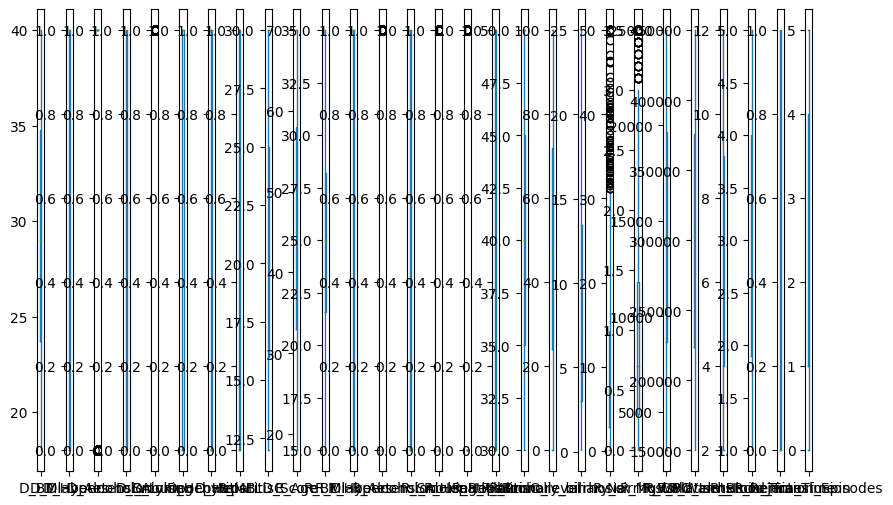

In [45]:
#Verify for outliers post the treatment

data_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) # sharey = True shares the Y axis across all plots


# increase spacing between subplots
plt.subplots_adjust(wspace = 3)
plt.show()

<AxesSubplot: >

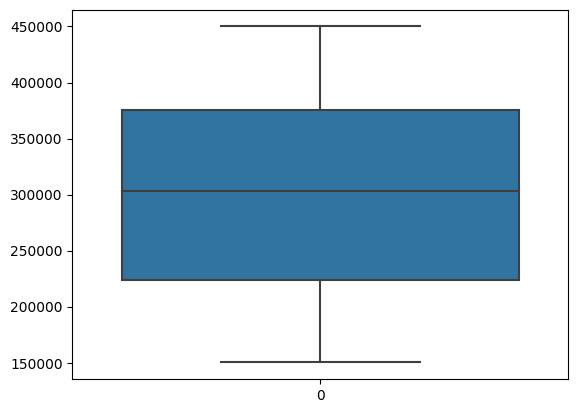

In [46]:
sns.boxplot(data.R_Platelets)

In [47]:
#Zero and near zero variance

data_num.var()

C:\Users\91866\AppData\Local\Temp\ipykernel_8028\3463260856.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_num.var()


D_BMI                          4.034091e+01
D_Diabetes                     1.947017e-01
D_Hypertension                 1.646252e-01
D_Alcohol_Abuse                2.488705e-01
D_Smoking                      1.788249e-01
D_Lympochyte                   2.383527e-01
D_HepatitisB                   2.500806e-01
D_HepatitisC                   2.420524e-01
R_MELD_Score                   2.988138e+01
R_Age                          2.262020e+02
R_BMI                          2.312912e+01
R_Diabetes                     2.177277e-01
R_Hypertension                 1.077264e-01
R_Alcohol_Abuse                2.040286e-01
R_Smoking                      1.262387e-01
R_HepatitisB                   1.575156e-01
R_HepatitisC                   2.164091e-01
R_Albumin_level                3.718094e+01
R_Alcoholic_cirrhosis          8.090816e+02
R_Primary_biliary_cirrhosis    5.758567e+01
R Na                           9.059465e+01
R_Mg                           8.270251e-01
R_WBC                          4

In [48]:
#Discretization / Binning / Grouping:

#Dummy Variable Creation

data.dtypes

Column1                             int64
D_Age                             float64
D_Gender                           object
D_BMI                             float64
D_Cause of Death                   object
D_Diabetes                          int64
D_Hypertension                      int64
D_Alcohol_Abuse                     int64
D_Smoking                           int64
D_Lympochyte                        int64
D_HepatitisB                      float64
D_HepatitisC                        int64
R_Etiology                         object
R_MELD_Score                        int64
R_Age                               int64
R_Gender                           object
R_BMI                             float64
R_Diabetes                          int64
R_Hypertension                      int64
R_Alcohol_Abuse                     int64
R_Smoking                           int64
R_HepatitisB                        int64
R_HepatitisC                        int64
R_Albumin_level                   

In [58]:
values = {'Female': 0, 'Male': 1}
data['D_Gender'] = data['D_Gender'].map(values)

In [59]:
values = {'Stroke': 2, 'Other': 1, 'Accident' : 0}
data['D_Cause of Death'] = data['D_Cause of Death'].map(values)

In [60]:
values = {'Other': 4, 'Alcohol': 1,'Hepatitis': 2, 'NAFLD': 3}
data['R_Etiology'] = data['R_Etiology'].map(values)

In [61]:
values = {'Female': 1, 'Male': 2}
data['R_Gender'] = data['R_Gender'].map(values)

In [62]:
values = {'Artery Thrombosis': 0, 'Biliary Complications': 1,'Cardivascular Complications': 2,'Infection': 3, 'Metabolic Complications': 4,'No Complication': 5,'Portal Vein Thrombosis': 6,'Post-transplant Diabetes' : 7,'Primary Graft Non-function': 8,'Rejection' : 9, 'Renal Dysfunction' : 9}
data['Complications'] = data['Complications'].map(values)

In [63]:
values = {'Cyclosporine': 0, 'Tacrolimus': 2,'Other': 1}
data['R_Immunosuppressant_Medication'] = data['R_Immunosuppressant_Medication'].map(values)

In [64]:
data.dtypes

Column1                             int64
D_Age                             float64
D_Gender                          float64
D_BMI                             float64
D_Cause of Death                  float64
D_Diabetes                          int64
D_Hypertension                      int64
D_Alcohol_Abuse                     int64
D_Smoking                           int64
D_Lympochyte                        int64
D_HepatitisB                      float64
D_HepatitisC                        int64
R_Etiology                        float64
R_MELD_Score                        int64
R_Age                               int64
R_Gender                          float64
R_BMI                             float64
R_Diabetes                          int64
R_Hypertension                      int64
R_Alcohol_Abuse                     int64
R_Smoking                           int64
R_HepatitisB                        int64
R_HepatitisC                        int64
R_Albumin_level                   

In [65]:
data.head()

,Column1,D_Age,D_Gender,D_BMI,D_Cause of Death,D_Diabetes,D_Hypertension,D_Alcohol_Abuse,D_Smoking,D_Lympochyte,...,R Na,R_Mg,R_WBC,R_Platelets,R_Cold_Ischemia_Time,R_Warm_Ischemia_Time,R_Blood_Transfusion,R_Immunosuppressant_Medication,R_Rejection_Episodes,Complications
0,0,40.0,NaN,32.2,NaN,1,1,1,0,0,...,5.9,1.5,21310,426232,3,2.1,0.0,NaN,3,NaN
1,1,45.0,NaN,32.1,NaN,0,0,0,0,1,...,1.8,0.3,19471,414357,3,3.0,0.0,NaN,1,NaN
3,3,41.0,NaN,39.3,NaN,1,1,1,0,1,...,18.7,1.3,24350,190143,11,2.5,0.0,NaN,0,NaN
4,4,66.0,NaN,38.4,NaN,1,1,1,0,0,...,7.8,1.2,14871,403780,2,1.5,1.0,NaN,3,NaN
5,5,20.0,NaN,38.6,NaN,1,1,0,0,1,...,26.7,0.2,23304,197417,6,3.3,0.0,NaN,5,NaN


In [66]:
### Standardization

from sklearn.preprocessing import StandardScaler


In [67]:
# Initialise the Scaler

scaler = StandardScaler()

In [68]:
# To scale data
data = scaler.fit_transform(data)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\91866\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [69]:
# Applying One-Hot Encoding with get_dummies

data_cate = pd.get_dummies(data_cate, columns = ['D_Age'], drop_first = True)

In [70]:
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1937
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Column1     1931 non-null   int64
 1   D_Age_19.0  1931 non-null   uint8
 2   D_Age_20.0  1931 non-null   uint8
 3   D_Age_21.0  1931 non-null   uint8
 4   D_Age_22.0  1931 non-null   uint8
 5   D_Age_23.0  1931 non-null   uint8
 6   D_Age_24.0  1931 non-null   uint8
 7   D_Age_25.0  1931 non-null   uint8
 8   D_Age_26.0  1931 non-null   uint8
 9   D_Age_27.0  1931 non-null   uint8
 10  D_Age_28.0  1931 non-null   uint8
 11  D_Age_29.0  1931 non-null   uint8
 12  D_Age_30.0  1931 non-null   uint8
 13  D_Age_31.0  1931 non-null   uint8
 14  D_Age_32.0  1931 non-null   uint8
 15  D_Age_33.0  1931 non-null   uint8
 16  D_Age_34.0  1931 non-null   uint8
 17  D_Age_35.0  1931 non-null   uint8
 18  D_Age_36.0  1931 non-null   uint8
 19  D_Age_37.0  1931 non-null   uint8
 20  D_Age_38.0  1931 non-null   ui

In [71]:
# The dimension of the dataset after One-Hot Encoding

data_cate.shape

(1931, 53)

In [72]:
data_cate.head()

,Column1,D_Age_19.0,D_Age_20.0,D_Age_21.0,D_Age_22.0,D_Age_23.0,D_Age_24.0,D_Age_25.0,D_Age_26.0,D_Age_27.0,...,D_Age_61.0,D_Age_62.0,D_Age_63.0,D_Age_64.0,D_Age_65.0,D_Age_66.0,D_Age_67.0,D_Age_68.0,D_Age_69.0,D_Age_70.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
import pandas as pd

# Assuming data is a NumPy ndarray
data = pd.DataFrame(data)  # Convert ndarray to DataFrame

In [75]:
# Scaling of the features is required
# Normalization function
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return x

In [76]:
# Normalized data frame
data_norm = norm_func(data.iloc[:, :2])
data_norm.describe()

,0,1
count,1931.000000,1931.000000
mean,0.499528,0.504073
std,0.288379,0.290151
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.499483,0.500000
75%,0.748966,0.750000
max,1.000000,1.000000
